# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There is no null values in the dataset, as it is seen above.

Descriptive statistics of the Dataframe

In [11]:
print(df.describe())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


For Male;

In [12]:
print(df[df.gender=='M'].describe())

       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


For Female;

In [14]:
print(df[df.gender=='F'].describe())

       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


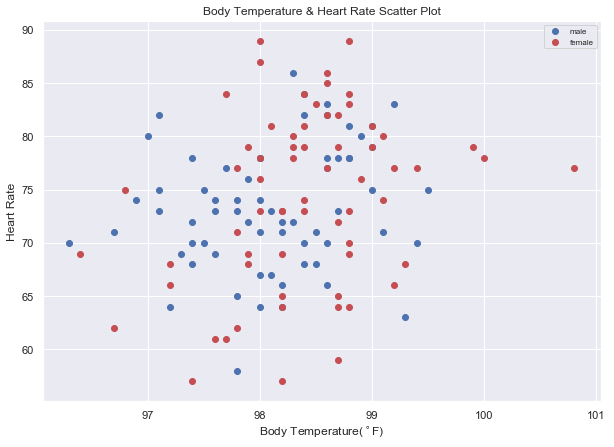

In [52]:
sns.set()
plt.figure(figsize = (10,7))
#colors=['b' if g=='M' else 'R' for g in df.gender]
m=plt.scatter(df[df.gender=='M']['temperature'],df[df.gender=='M']['heart_rate'],c='b')
f=plt.scatter(df[df.gender=='F']['temperature'],df[df.gender=='F']['heart_rate'],c='r')
_ = plt.xlabel('Body Temperature($^\circ$F)')
_ = plt.ylabel('Heart Rate')
_ = plt.title ('Body Temperature & Heart Rate Scatter Plot')
_ = plt.legend((m,f),('male','female'),fontsize=8,loc=0,scatterpoints=1)
plt.show()

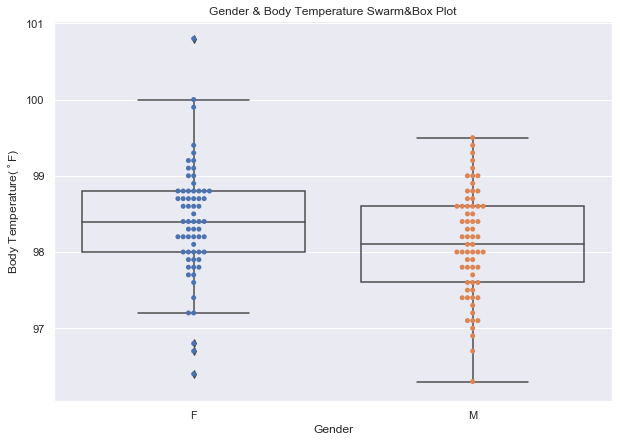

The std of the Female Temperature: 0.7377464486428966
The variance of the Female Temperature: 0.5442698224852061


The std of the Male Temperature: 0.6933598841828699
The variance of the Male Temperature: 0.4807479289940827


In [48]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(x= 'gender', y = 'temperature', data = df)
_ = sns.boxplot(x="gender", y="temperature", data=df, boxprops={'facecolor':'None'})
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature($^\circ$F)')
_ = plt.title ('Gender & Body Temperature Swarm&Box Plot')
plt.show()
print ('The std of the Female Temperature: {}'. format(np.std(df.temperature[df.gender =='F'].values)))
print ('The variance of the Female Temperature: {}'. format(np.var(df.temperature[df.gender =='F'].values)))
print ('\n')
print ('The std of the Male Temperature: {}'. format(np.std(df.temperature[df.gender =='M'].values)))
print ('The variance of the Male Temperature: {}'. format(np.var(df.temperature[df.gender =='M'].values)))

# 1. Is the distribution of body temperatures normal? 

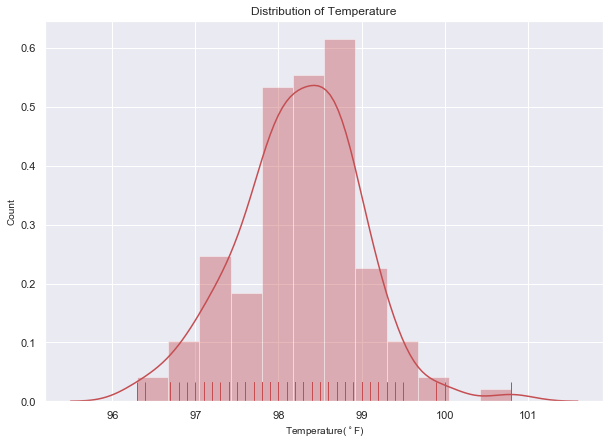

In [67]:
plt.figure(figsize=(10,7))
sns.distplot(df.temperature, bins=12, rug='True', color = 'r', norm_hist = True)
plt.xlabel('Temperature($^\circ$F)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Temperature', fontsize=12)
plt.show()

In [50]:
from scipy import stats
k2, p = stats.normaltest(df.temperature)
alpha = 0.01
print ("alpha = {:g}".format(alpha))
print ("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

alpha = 0.01
p = 0.258748
The null hypothesis cannot be rejected


For an approximately normal data set, the values within one standard deviation of the mean account for about 68% of the set; while within two standard deviations account for about 95%; and within three standard deviations account for about 99.7%. Shown percentages are rounded theoretical probabilities intended only to approximate the empirical data derived from a normal population. 


68–95–99.7 Rule is a shorthand used to remember the percentage of values that lie within a band around the mean in a normal distribution with a width of two, four and six standard deviations, respectively; more accurately, 68.27%, 95.45% and 99.73% of the values lie within one, two and three standard deviations of the mean, respectively.

In [40]:
temp_mean = np.mean(df.temperature)
temp_std = np.std(df.temperature)
print("The mean of human temperature data set: {}".format(temp_mean))
print("The standard deviation in human temperature data set: {}".format(temp_std))

The mean of human temperature data set: 98.24923076923078
The standard deviation in human temperature data set: 0.7303577789050377


In [43]:
np_temp = df.temperature.values
print("Total number of observations is {}".format(len(df)))
num_obs = len(np_temp[(np_temp > temp_mean-3*temp_std) & (np_temp < temp_mean+3*temp_std)])
print('Number  of observations within three standard deviations of the mean: {}'.format(num_obs))
prop_obs = float(num_obs) / len(np_temp)
print('Proportion of observations within three standard deviations of the mean: {}'.format(prop_obs))

num_obs = len(np_temp[(np_temp > temp_mean-2*temp_std) & (np_temp < temp_mean+2*temp_std)])
print('Number  of observations within two standard deviations of the mean: {}'.format(num_obs))
prop_obs = float(num_obs) / len(np_temp)
print('Proportion of observations within two standard deviations of the mean: {}'.format(prop_obs))

num_obs = len(np_temp[(np_temp > temp_mean-1*temp_std) & (np_temp < temp_mean+1*temp_std)])
print('Number  of observations within one standard deviations of the mean: {}'.format(num_obs))
prop_obs = float(num_obs) / len(np_temp)
print('Proportion of observations within one standard deviations of the mean: {}'.format(prop_obs))

Total number of observations is 130
Number  of observations within three standard deviations of the mean: 129
Proportion of observations within three standard deviations of the mean: 0.9923076923076923
Number  of observations within two standard deviations of the mean: 123
Proportion of observations within two standard deviations of the mean: 0.9461538461538461
Number  of observations within one standard deviations of the mean: 90
Proportion of observations within one standard deviations of the mean: 0.6923076923076923


In [44]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n= len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)
    
    return x, y

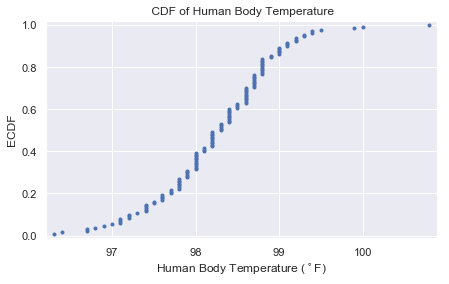

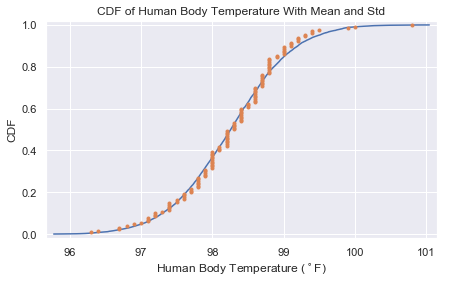

In [54]:
temp_array = np.array(df.temperature)

x_temp, y_temp = ecdf(temp_array)
plt.figure(figsize = (7,4))
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('ECDF')
_ = plt.title(' CDF of Human Body Temperature')
plt.show()

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_array)
sigma = np.std(temp_array)
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma, size = 10000)
# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_array)
# Plot the CDFs and show the plot
plt.figure(figsize = (7,4))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Human Body Temperature ($^\circ$F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Human Body Temperature With Mean and Std')
plt.show()

##### After these results, df.temperature is normally distributed

# 2. Is the sample size large? Are the observations independent?

The Central Limit Theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). Sample size (len(def['temperature']) =130) is large enough. Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation.

 Independence of observations makes sure that each participant's variance affects the overall analysis just once. In terms of the temperature & heart_rate, these oservations are independent.

If we talk about the above-mentioned scatter plot of Body Temperature and Heart Rate with the regression lines added, a positive correlation is visible.

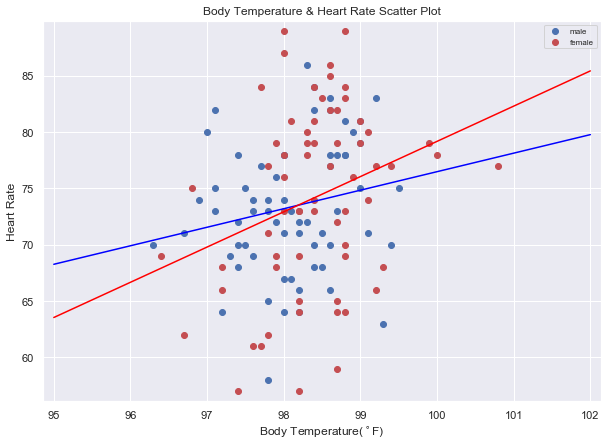

In [86]:
plt.figure(figsize = (10,7))
#colors=['b' if g=='M' else 'R' for g in df.gender]
m=plt.scatter(df[df.gender=='M']['temperature'],df[df.gender=='M']['heart_rate'],c='b')
f=plt.scatter(df[df.gender=='F']['temperature'],df[df.gender=='F']['heart_rate'],c='r')
_ = plt.xlabel('Body Temperature($^\circ$F)')
_ = plt.ylabel('Heart Rate')
_ = plt.title ('Body Temperature & Heart Rate Scatter Plot')
_ = plt.legend((m,f),('male','female'),fontsize=8,loc=0,scatterpoints=1)

slope_m, intercept_m = np.polyfit(df[df.gender=='M']['temperature'], df[df.gender=='M']['heart_rate'], 1)
slope_f, intercept_f = np.polyfit(df[df.gender=='F']['temperature'], df[df.gender=='F']['heart_rate'], 1)

x = np.array([95,102])
y_m = slope_m * x + intercept_m
y_f = slope_f * x + intercept_f

_ = plt.plot(x, y_m, color='blue')
_ = plt.plot(x, y_f, color='red')
plt.margins(0.02)
plt.show()

In [87]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

print("The pearson correlation coefficient of human temperature and heart rate in the data set: {}"
      .format(pearson_r(df['temperature'],df['heart_rate'])))
print("The pearson correlation coefficient of human temperature and heart rate of Males in the data set: {}"
      .format(pearson_r(df[df.gender == 'M']['temperature'], df[df.gender == 'M']['heart_rate'])))
print("The pearson correlation coefficient of human temperature and heart rate of Females in the data set: {}"
      .format(pearson_r(df[df.gender == 'F']['temperature'], df[df.gender == 'F']['heart_rate'])))

The pearson correlation coefficient of human temperature and heart rate in the data set: 0.25365640272076423
The pearson correlation coefficient of human temperature and heart rate of Males in the data set: 0.19558937509687493
The pearson correlation coefficient of human temperature and heart rate of Females in the data set: 0.28693115449710993


# 3. Is the true population mean really 98.6 degrees F? 

First, try a bootstrap hypothesis test. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the tt or zz statistic? Now try using the other test. How is the result be different? Why?

In [88]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))   
## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)            
    return bs_replicates

##### Bootstrap Hypothesis Test:

The null hypothesis : The population mean temperature is 98.6F 

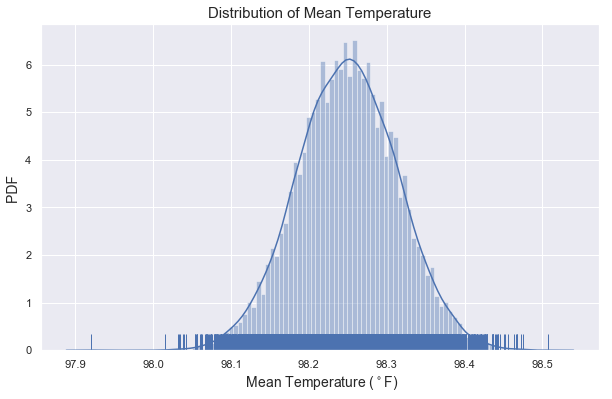

95% confidence interval = [98.12382692 98.37540385]
p-value 0.0


In [90]:
temp_array = np.array(df['temperature'])
bs_replicates  = draw_bs_reps(temp_array, np.mean, 10000)
plt.figure(figsize=(10,6))
sns.distplot(bs_replicates, rug='True', bins=100, color = 'b')
plt.xlabel(' Mean Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title('Distribution of Mean Temperature', fontsize=15)
plt.show()

conf_int = np.percentile(bs_replicates,[2.5, 97.5])
print('95% confidence interval =', conf_int)

p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print ('p-value', p)

Since p-value is 0 or less than 0.05, we reject the claim that the mean Human temperature is 98.6 in favor of the alternative hypothesis that the poulation mean differs from 98.6 F. Based on the 95% confidence interval, temperatures between 98.12 and 98.37 are considered normal.

##### Frequentist Statistical Test:

Since the sample is normally distrubuted, the maximum likelihood estimate of the population mean is equal to the sample mean. 

In [91]:
print("The mean human temperature in the data set is {}".format(np.mean(df['temperature'])))
print("Therefore we infer that the population mean  differs from 98.6 F")

The mean human temperature in the data set is 98.24923076923078
Therefore we infer that the population mean  differs from 98.6 F


We should use 1-sample test. Because we are comparing a dataset to a single number. I will create a shifted data and bootstrap sampling on it.

We sshould use T Test. Because the data is normally distributed and standard deviation of the population is not given. If we use std of the sample instead we will find same results.

In [125]:
shifted_data=temp_array-np.mean(temp_array)+98.6
shifted_data_replicates=draw_bs_reps(shifted_data,np.mean,10000)
p = np.sum(shifted_data_replicates <= np.mean(temp_array)) / 10000
print ('p-value: {}'.format(float(p)))

sample_mean = np.mean(temp_array) 
sample_std  = np.std(temp_array)
sample_size = len(temp_array)
mu_0 = 98.6
std_err = sample_std / sample_size**0.5
deg_freedom = sample_size - 1
t_test = (sample_mean - mu_0) / std_err

from scipy import stats
# Multiply by two for the two tailed test
t_result = stats.ttest_1samp(temp_array, 98.6)
print('t-statistic = {}'.format(t_result))
print('t-statistic = ', (stats.t.sf(np.abs(t_test),deg_freedom)*2))


p-value: 0.0
t-statistic = Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
t-statistic =  2.1887464624050777e-07


Since t-statistic are less than 0.05, reject the null hypothesis that the true mean is 98.6

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [126]:
temp_array_ = np.random.choice(temp_array, size=10, replace=True)
shifted_temp_data=temp_array_-np.mean(temp_array_)+98.6
shifted_temp_data_replicates=draw_bs_reps(shifted_temp_data,np.mean,10000)
p = np.sum(shifted_temp_data_replicates <= np.mean(temp_array_)) / 10000
print ('p-value: {}'.format(float(p)))

sample_mean = np.mean(temp_array_) 
sample_std  = np.std(temp_array_)
sample_size = len(temp_array_)
mu_0 = 98.6
t_test = (sample_mean - mu_0) / (sample_std / sample_size**0.5)

# Multiply by two for the two tailed test
t_result = stats.norm.sf(abs(t_test))*2
print('t-statistic = {}'.format(t_result))
print('t-statistic = {}'.format(stats.ttest_1samp(temp_array_, 98.6)))

p-value: 0.0
t-statistic = 0.0003124253454184508
t-statistic = Ttest_1sampResult(statistic=-3.419788363425712, pvalue=0.0076304868442428325)


Since p-value is greater than 0.05, we can not reject null Hypothesis that the true mean is 98.6 F. Each time once we run the code, we get different t statistics since the sample size is too small to evaluate. Therefore t statistics are not reliable at this point.

In [129]:
z_test = (np.mean(temp_array_)-98.6)/ np.std(temp_array) / np.sqrt(len(temp_array_))
2*stats.norm.cdf(z_test)

0.7519472090612817

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

We will get a 95% confidence interval according to the normal distribution to find out the outliers.

##### Bootstrap Approach

In [109]:
bs_replicates = draw_bs_reps(temp_array, np.mean, 10000)
conf_interval = np.percentile(bs_replicates,[2.5, 97.5])
print('95 % confidence interval = {}'.format(conf_interval))

95 % confidence interval = [98.12230769 98.37538462]


In [133]:
shifted_data=temp_array-np.mean(temp_array)+98.6
shifted_data_replicates=draw_bs_reps(shifted_data,np.mean,10000)
np.percentile(shifted_data_replicates,[2.5,97.5])

array([98.47459615, 98.72615385])

*Values,which are not between 98.47 and 98.72, are determined as abnormals.

##### Frequentist Approach

In [130]:
Mu, StD, NSie = df.temperature.mean(), df.temperature.std(), len(df.temperature)
sampleError = stats.sem(df.temperature)
CI = stats.norm.interval(0.95, Mu, sampleError)
print ('Sample mean:             {Mu:0.2f}\n'
       'Sample variance:         {v:0.3f}\n'
       'Sample margin of error:  {sem:0.4f}\n'
       '95% confidence interval: {CI}'
       .format(Mu=Mu, v=StD**2, sem=sampleError, CI=CI))

Sample mean:             98.25
Sample variance:         0.538
Sample margin of error:  0.0643
95% confidence interval: (98.12319642818166, 98.3752651102799)


In [131]:
stats.t.interval(.95,len(df.temperature)-1,Mu,sampleError)

(98.12200290560804, 98.37645863285351)

*In Frequentist approach we end up with the temperature not between 98.12 and 98.37 as abnormals.

# 6. Is there a significant difference between males and females in normal temperature?¶

What testing approach did you use and why? Write a story with your conclusion in the context of the original problem.

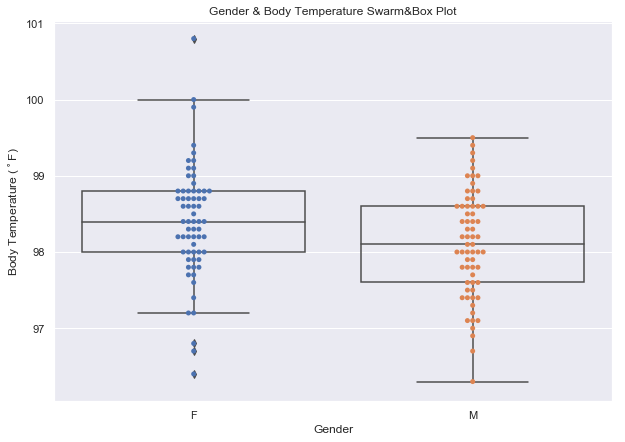

In [113]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(x= 'gender', y = 'temperature', data = df)
_ = sns.boxplot(x="gender", y="temperature", data=df, boxprops={'facecolor':'None'})
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature ($^\circ$F)')
_ = plt.title ('Gender & Body Temperature Swarm&Box Plot')
plt.show()

Null Hypothesis is: There is no significant difference between Males and Females in average(mean) temperature. We are going to implement 2_sample test.

In [116]:
temp_m = df[df.gender == 'M']['temperature']
temp_f = df[df.gender == 'F']['temperature']

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

empirical_diff_means = diff_of_means(temp_f, temp_m)
concat_temp = np.concatenate((temp_f, temp_m))

bs_replicates = np.empty(100000)

for i in range(100000):
    bs_sample = np.random.choice(concat_temp, size=len(concat_temp))
    bs_replicates[i] = diff_of_means(bs_sample[:len(temp_m)], bs_sample[len(temp_m):])
p = np.sum(bs_replicates >= empirical_diff_means) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

p-value: 0.01166


Since p-value is less than 0.05 we should reject the null hypothesis which means females and males have different average body temperatures.